# Example of computation of surface correlation functions using `CorrelationFunctions.jl` package.

In [1]:
using PyPlot
using CorrelationFunctions
using Images
using FFTW

┌ Info: Precompiling CorrelationFunctions [cd8c4018-4f35-43b7-8520-d042ebaeaa2d]
└ @ Base loading.jl:1423


In this notebook we demonstrate how to compute surface-void and surface-surface correlation functions for 2D and 3D images, namely for a disk and a ball.

In [2]:
"""
    draw_ball(s, r)

Draw N-dimensional ball of radius `r`. Return an array of shape `s`.
"""
function draw_ball(s, r)
    array = zeros(Bool, s)
        center = @. (s ÷ 2) |> floor |> Int

    for idx in CartesianIndices(array)
        dist = sum((Tuple(idx) .- center) .^ 2)
        if dist <= r^2
            array[idx]  = true
        end
    end

    return array
end

draw_ball

## 2D

Here we draw a disk with radus $R = 120$ and compute correlation functions for that image.

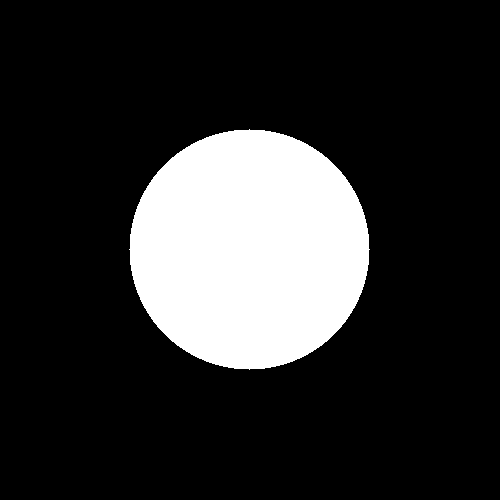

In [3]:
data = draw_ball((500, 500), 120)
Gray.(data)

### Surface-surface function

Here is an image of $F_{ss}$ map. Zero correlation length is in the center of the image.

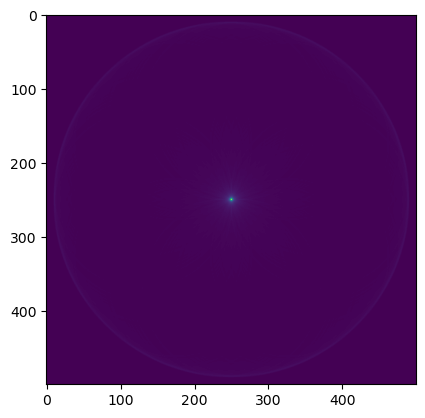

PyObject <matplotlib.image.AxesImage object at 0x8f294b1f0>

In [4]:
ss_map = Map.surfsurf(data, true; periodic = true)
ss_map |> fftshift |> imshow

Here is a plot of $F_{ss}(r)$ averaged over all directions. Analytical solution is provided for comparison

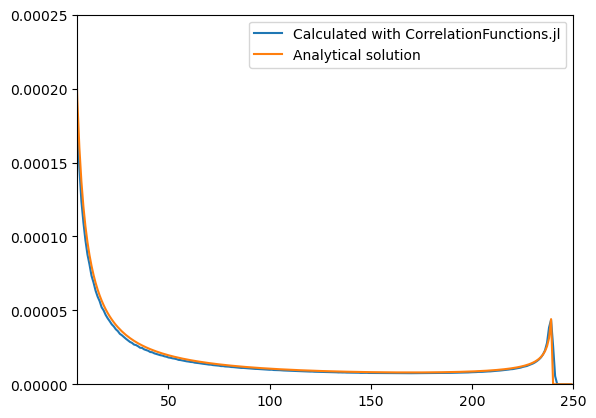

(0.0, 0.00025)

In [5]:
ss_theory(r, R) = (r < 2R) ? 4R^2/(r*sqrt(4R^2-r^2)) : 0
ssm = Map.mean_dir(ss_map)[1:250]

plot(ssm)
plot(0:249, ss_theory.(0:249, 120) / 500^2)
legend(["Calculated with CorrelationFunctions.jl", "Analytical solution"])
# Here we do not show small correlation lengths because analytical solution is ill-behaved at r = 0
xlim([5, 250])
ylim([0, 0.00025])

### Surface-void function

Here is an image of $F_{sv}$ map. Zero correlation length is in the center of the image.

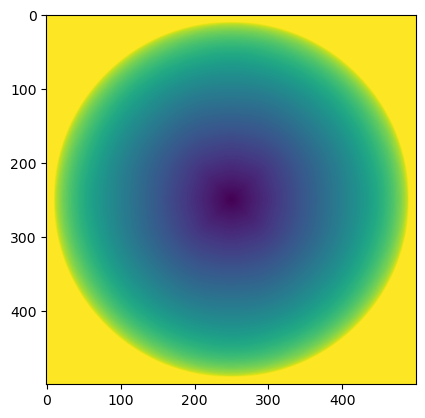

PyObject <matplotlib.image.AxesImage object at 0x8f3356a30>

In [6]:
sv_map = Map.surfvoid(data, true; periodic = true)
sv_map |> fftshift |> imshow

Here is a plot of $F_{sv}(r)$ averaged over all directions and analytical solution for comparison.

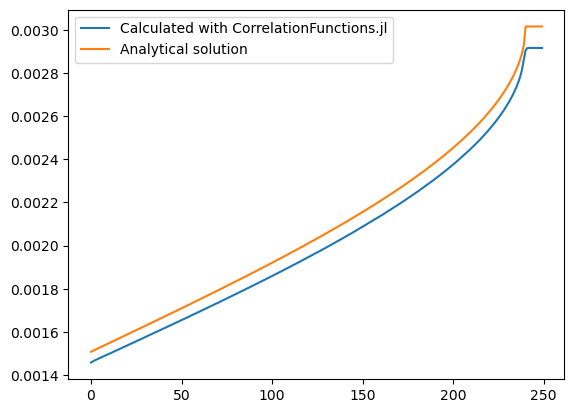

PyObject <matplotlib.legend.Legend object at 0x8f396d640>

In [7]:
sv_theory(r, R) = (r < 2R) ? 2R*(π - acos(r/(2R))) : 2π*R
svm = Map.mean_dir(sv_map)[1:250]

plot(svm)
plot(0:249, sv_theory.(0:249, 120) / 500^2)
legend(["Calculated with CorrelationFunctions.jl", "Analytical solution"])

## 3D

Here we draw a ball with radus $R = 40$ and compute correlation functions for that image.

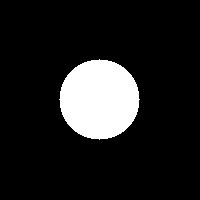

In [8]:
data = draw_ball((200, 200, 200), 40)
Gray.(data[:,:,100])

Surface-surface function averaged over all directions + analytical solution

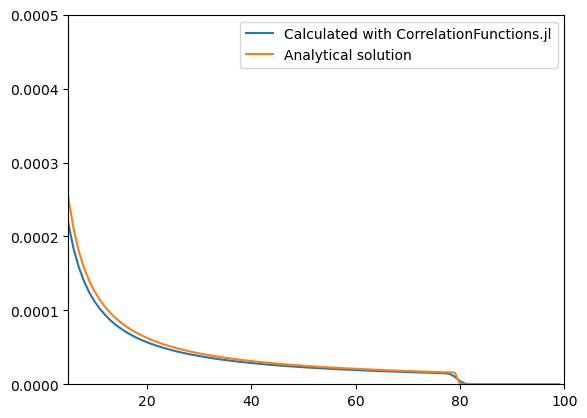

PyObject <matplotlib.legend.Legend object at 0x8f39ea760>

In [9]:
ss_map = Map.surfsurf(data, true; periodic = true)
ssm = Map.mean_dir(ss_map)[1:100]
ss_theory(r, R) = (r < 2R) ? 2π*R^2/r : 0

plot(ssm)
plot(0:99, ss_theory.(0:99, 40) / 200^3)
# Again, cut a region around r = 0
xlim([5, 100])
ylim([0, 0.0005])
legend(["Calculated with CorrelationFunctions.jl", "Analytical solution"])

Surface-void function averaged over all directions + analytical solution

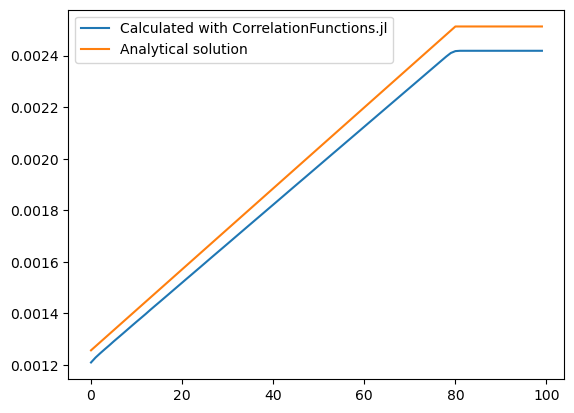

PyObject <matplotlib.legend.Legend object at 0x902503160>

In [10]:
sv_theory(r, R) = (r < 2R) ? (π*R*r + 2π*R^2) : 4π*R^2
sv_map = Map.surfvoid(data, true; periodic = true)
svm = Map.mean_dir(sv_map)[1:100]

plot(svm)
plot(0:99, sv_theory.(0:99, 40) / 200^3)
legend(["Calculated with CorrelationFunctions.jl", "Analytical solution"])